In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn import metrics

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
#Loading data from local storage
dataset = pd.read_csv("./train.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_21356\3897846089.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("./train.csv")


In [4]:
dataset.shape

(100000, 28)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
dataset.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Data Preprocessing

In [7]:
dataset.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

In [9]:
# getting the feature names in a list
dataCols = list(dataset.columns.values)

# calculating the number of each feature's unique values
ListUniqueC = []
for i in dataset.columns:
    UCount = len(dataset[i].unique())
    ListUniqueC.append(UCount)

# creating the unique values table
UniqueCTable = pd.DataFrame(list(zip(dataCols, ListUniqueC)))
UniqueCTable.columns = ['Feature', 'Unique Values']

# printing the report
print('Unique values in each feature in the dataset:')
print(UniqueCTable.to_string(index = False))

Unique values in each feature in the dataset:
                 Feature  Unique Values
                      ID         100000
             Customer_ID          12500
                   Month              8
                    Name          10140
                     Age           1788
                     SSN          12501
              Occupation             16
           Annual_Income          18940
   Monthly_Inhand_Salary          13236
       Num_Bank_Accounts            943
         Num_Credit_Card           1179
           Interest_Rate           1750
             Num_of_Loan            434
            Type_of_Loan           6261
     Delay_from_due_date             73
  Num_of_Delayed_Payment            750
    Changed_Credit_Limit           4384
    Num_Credit_Inquiries           1224
              Credit_Mix              4
        Outstanding_Debt          13178
Credit_Utilization_Ratio         100000
      Credit_History_Age            405
   Payment_of_Min_Amount          

In [10]:
# categorical features that are supposedly to be numerical instead
FeaturesToConvert = ['Age',
                     'Annual_Income',
                     'Num_of_Loan',
                     'Num_of_Delayed_Payment',
                     'Changed_Credit_Limit',
                     'Outstanding_Debt',
                     'Amount_invested_monthly',
                     'Monthly_Balance'] 
# 'Credit_History_Age' feature will be dealt with later

# checking the unique values of these features
for feature in FeaturesToConvert:
    uniques = dataset[feature].unique()
    print('Feature:', '\n',
          feature,'\n',
          uniques, '\n',
          '--'*40, '\n')

Feature: 
 Age 
 ['23' '-500' '28_' ... '4808_' '2263' '1342'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Annual_Income 
 ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Num_of_Loan 
 ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'
 '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590

 -------------------------------------------------------------------------------- 

Feature: 
 Amount_invested_monthly 
 ['80.41529543900253' '118.28022162236736' '81.699521264648' ...
 '24.02847744864441' '251.67258219721603' '167.1638651610451'] 
 -------------------------------------------------------------------------------- 

Feature: 
 Monthly_Balance 
 ['312.49408867943663' '284.62916249607184' '331.2098628537912' ...
 516.8090832742814 319.1649785257098 393.6736955618808] 
 -------------------------------------------------------------------------------- 



In [11]:
# removing the '-' and '_' characters
for feature in FeaturesToConvert:
    dataset[feature] = dataset[feature].str.strip('-_')
    

# handling the empty members in each feature
for feature in FeaturesToConvert:
    dataset[feature] = dataset[feature].replace({'':np.nan})
    

# trying converting the categorical features into numerical type
for feature in FeaturesToConvert:
    dataset[feature] = dataset[feature].astype('float64')
    

# checking if the conversion is successful
for feature in FeaturesToConvert:
    print('dataset dataframe:', feature, '\n',
          dataset[feature].dtype)
    

dataset dataframe: Age 
 float64
dataset dataframe: Annual_Income 
 float64
dataset dataframe: Num_of_Loan 
 float64
dataset dataframe: Num_of_Delayed_Payment 
 float64
dataset dataframe: Changed_Credit_Limit 
 float64
dataset dataframe: Outstanding_Debt 
 float64
dataset dataframe: Amount_invested_monthly 
 float64
dataset dataframe: Monthly_Balance 
 float64


In [12]:
# splitting each member of the 'Credit_History_Age' feature
SplitHistoryAge = [str(date).split(' ') for date in dataset['Credit_History_Age']]

# getting the year
CreditYear = [item[0] for item in SplitHistoryAge]

# Converting the year to month
CreditYear = [float(x) * 12 for x in CreditYear]

# getting the month
CreditMonth = []
for item in SplitHistoryAge:
    if len(item) > 1:
        CreditMonth.append(item[3]) # for non-nan member
    else:
        CreditMonth.append(item[0]) # for nan member

# combining the year and month
CombinedCreditAge = [float(CreditYear[i]) + float(CreditMonth[i]) for i in range(len(CreditYear))]

# assigning the combined month to the 'Credit_History_Age' feature
dataset['Credit_History_Age'] = CombinedCreditAge

# checking the first five rows again
dataset['Credit_History_Age'].head()

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64

In [13]:
dataset.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500.0,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [14]:
# storing the categorical column name into a list
CatFeatures = []
for feature in dataset.columns:
    if dataset[feature].dtype == 'object':
        CatFeatures.append(feature)

# storing the numerical column name into a list
NumFeatures = []
for feature in dataset.columns:
    if dataset[feature].dtype == 'float64' or dataset[feature].dtype == 'int64':
        NumFeatures.append(feature)

In [15]:
dataset['SSN'].unique()

array(['821-00-0265', '#F%$D@*&8', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [16]:
# dropping the '#F%$D@*&8' value from the SSN feature
dataset['SSN'] = dataset['SSN'].replace('#F%$D@*&8', np.nan)

In [17]:
# filling in the missing values in SSN feature
dataset['SSN'] = dataset['SSN'].fillna(dataset.groupby('Customer_ID')\
                                   ['SSN']\
                                   .transform(lambda x:x.mode().iat[0]))

In [18]:
# dropping the '_______' values
dataset['Occupation'] = dataset['Occupation'].replace('_______', np.NaN)

In [19]:
# filling in the missing values in Occupation feature
dataset['Occupation'] = dataset['Occupation'].fillna(dataset.groupby('Customer_ID')['Occupation'].transform(lambda x:x.mode().iat[0]))

In [20]:
dataset['Type_of_Loan'] = dataset['Type_of_Loan'].astype('str')

In [21]:
# dropping the 'and ' strings
dataset['Type_of_Loan'] = [item.replace('and ', '') for item in dataset['Type_of_Loan']]
# dropping unuseful blank space
dataset['Type_of_Loan'] = [item.replace(', ', ',') for item in dataset['Type_of_Loan']]
# splitting each item in the member of the feature by comma delimiter
dataset['Type_of_Loan'] = [item.split(',') for item in dataset['Type_of_Loan']]

In [22]:
# unique value counts (frequency) of each unique value
listUVcount = pd.Series([x for _list in dataset['Type_of_Loan'] for x in _list]).value_counts()
listUVcount

# Type_of_Loan unique values (excluding nan)
listUV = list(listUVcount[:-1].index)
listUV

# the sum of all unique values (excluding nan)
totalcount = sum(listUVcount[:-1])
totalcount

# calculating the probabilities of each unique value
listUVportion = []
for UVcount in listUVcount[:-1]:
    UVportion = UVcount / totalcount
    listUVportion.append(UVportion)
listUVportion

# creating the report table
table = pd.DataFrame(list(zip(listUV, listUVcount[:-1], listUVportion)))
table.columns = ['Type_of_Loan', 'Count', 'Portion']

# report
table

,Type_of_Loan,Count,Portion
0,Payday Loan,40568,0.114830
1,Credit-Builder Loan,40440,0.114468
2,Not Specified,39616,0.112135
3,Home Equity Loan,39104,0.110686
4,Student Loan,38968,0.110301
5,Mortgage Loan,38936,0.110210
6,Personal Loan,38888,0.110075
7,Debt Consolidation Loan,38776,0.109757
8,Auto Loan,37992,0.107538


In [23]:
# filling in the missing Type_of_Loan data
#dataset['Type_of_Loan'] = dataset['Type_of_Loan'].fillna(pd.Series(np.random.choice(listUV,p = listUVportion,size = len(dataset['Type_of_Loan']))))

In [24]:
# checking how many '!@9#%8' Payment_Behaviour values there are
print(len(dataset[dataset['Payment_Behaviour'] == '!@9#%8']))

7600


In [25]:
# dropping the '!@9#%8' value from the Payment_Behaviour feature
dataset['Payment_Behaviour'] = dataset['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [26]:
# filling in the missing values in Payment_Behaviour feature
dataset['Payment_Behaviour'] = dataset['Payment_Behaviour'].fillna(dataset.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x:x.mode().iat[0]))

In [27]:
# dropping the '_' value
dataset['Credit_Mix'] = dataset['Credit_Mix'].replace('_', np.nan)

In [28]:
# filling in the remaining missing values with the unique value probability
dataset['Credit_Mix'] = dataset['Credit_Mix'].fillna(pd.Series(np.random.choice(listUV,p = listUVportion, size = len(dataset))))

In [29]:
dataset[NumFeatures].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,90970.000000,100000.000000,95521.000000,9.713200e+04
mean,119.509700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,10.761960,21.068780,30.946268,10.465678,27.754251,1426.220376,32.285173,221.195405,1403.118217,637.412998,3.088580e+22
std,684.757313,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,61.789933,14.860104,226.028754,6.670732,193.177339,1155.129026,5.116875,99.741364,8306.041270,2043.319327,3.208492e+24
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,7.759665e-03
25%,25.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.350000,3.000000,566.072500,28.052567,144.000000,30.306660,74.534002,2.700037e+02
50%,34.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,219.000000,69.249473,135.925682,3.364770e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,302.000000,161.224249,265.731733,4.696852e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,404.000000,82331.000000,10000.000000,3.333333e+26


### Calculating the outlier percentage

In [30]:
# creating the population variable for Age 
dataPop = len(dataset['Age'])

# Age with value larger than 90
dataUpSample = (dataset['Age'] > 90).sum()

dataUpPerc = dataUpSample / dataPop


# Age with value smaller than 18
dataDownSample = (dataset['Age'] < 18).sum()

dataDownPerc = dataDownSample / dataPop


# report
print(' Dataset :', '\n',
      'Age with value larger than 90  :', dataUpSample,
      '(', dataUpPerc, '% )', '\n',
      'Age with value smaller than 18 :', dataDownSample,
      '(', dataDownPerc, '% )', '\n' * 2)

 Dataset : 
 Age with value larger than 90  : 2781 ( 0.02781 % ) 
 Age with value smaller than 18 : 5706 ( 0.05706 % ) 




In [31]:
# Dropping the outliers
# Train dataframe
NewAge = []
for i in range(len(dataset['Age'])):
    if dataset['Age'][i] > 90 or dataset['Age'][i] < 18:
        NewAge.append(np.nan)
    else:
        NewAge.append(dataset['Age'][i])       
dataset['Age'] = NewAge

In [32]:
# creating Age lookup table, aggregated by customer ID

# creating the dataframe containing Customer_ID and Age
AgeLookup = dataset[['Customer_ID', 'Age']]
# returning the Age mode of each customer
AgeLookup = AgeLookup.groupby('Customer_ID').agg(pd.Series.mode)

In [33]:
# replacing the Age value of each customer with each one's Mode
dataset['Age'] = dataset['Customer_ID'].map(AgeLookup['Age'])

In [34]:
# creating Age lookup table, aggregated by customer ID

# creating the dataframe containing Customer_ID and Age
MonthlyLookup = dataset[['Customer_ID', 'Monthly_Inhand_Salary']]
# returning the Age mode of each customer
MonthlyLookup = MonthlyLookup.groupby('Customer_ID').agg(pd.Series.mode)
# replacing the Age value of each customer with each one's Mode
dataset['Monthly_Inhand_Salary'] = dataset['Customer_ID'].map(MonthlyLookup['Monthly_Inhand_Salary'])

In [35]:
# creating Num_of_Delayed_Payment lookup table, aggregated by customer ID

# creating the dataframe containing Customer_ID and Num_of_Delayed_Payment
DelayedLookup = dataset[['Customer_ID', 'Num_of_Delayed_Payment']]
# returning the Num_of_Delayed_Payment mode of each customer
DelayedLookup = DelayedLookup.groupby('Customer_ID').agg(pd.Series.mode)
# replacing the Num_of_Delayed_Payment value of each customer with each one's Mode
dataset['Num_of_Delayed_Payment'] = dataset['Customer_ID'].map(DelayedLookup['Num_of_Delayed_Payment'])

In [36]:
# creating Changed_Credit_Limit  lookup table, aggregated by customer ID

# creating the dataframe containing Customer_ID and Changed_Credit_Limit 
creditLookup = dataset[['Customer_ID', 'Changed_Credit_Limit']]
# returning the Changed_Credit_Limit  mode of each customer
creditLookup = creditLookup.groupby('Customer_ID').agg(pd.Series.mode)
# replacing the Changed_Credit_Limit  value of each customer with each one's Mode
dataset['Changed_Credit_Limit'] = dataset['Customer_ID'].map(creditLookup['Changed_Credit_Limit'])

In [37]:
# creating Changed_Credit_Limit  lookup table, aggregated by customer ID

# creating the dataframe containing Customer_ID and Changed_Credit_Limit 
creditinqLookup = dataset[['Customer_ID', 'Num_Credit_Inquiries']]
# returning the Changed_Credit_Limit  mode of each customer
creditinqLookup = creditinqLookup.groupby('Customer_ID').agg(pd.Series.mode)
# replacing the Changed_Credit_Limit  value of each customer with each one's Mode
dataset['Num_Credit_Inquiries'] = dataset['Customer_ID'].map(creditinqLookup['Num_Credit_Inquiries'])

In [38]:

# creating the dataframe containing Customer_ID and Credit_History_Age 
credithisLookup = dataset[['Customer_ID', 'Credit_History_Age']]

# filling missing values with linear interpolation, grouped by customer ID
credithisLookup = credithisLookup.groupby('Customer_ID').apply(lambda group: group.interpolate())

# replacing missing values in dataset with interpolated values
dataset['Credit_History_Age'] = credithisLookup['Credit_History_Age'].values
# remove rows with missing or invalid Credit_History_Age values
dataset = dataset.dropna(subset=['Credit_History_Age'])

In [39]:
# creating Changed_Credit_Limit  lookup table, aggregated by customer ID

# creating the dataframe containing Customer_ID and Changed_Credit_Limit 
amountinqLookup = dataset[['Customer_ID', 'Amount_invested_monthly']]
# returning the Changed_Credit_Limit  mode of each customer
amountinqLookup = amountinqLookup.groupby('Customer_ID').agg(pd.Series.mean)
# replacing the Changed_Credit_Limit  value of each customer with each one's Mode
dataset['Amount_invested_monthly'] = dataset['Customer_ID'].map(amountinqLookup['Amount_invested_monthly'])

In [40]:


# create the dataframe containing Customer_ID and Monthly_Balance
balanceinqLookup = dataset[['Customer_ID', 'Monthly_Balance']]

# compute the mean Monthly_Balance for each customer
balanceinqLookup = balanceinqLookup.groupby('Customer_ID').mean()

# replace Monthly_Balance with the mean value for each customer
dataset['Monthly_Balance'] = dataset['Customer_ID'].map(balanceinqLookup['Monthly_Balance'])

# remove rows with missing or invalid Monthly_Balance values
dataset = dataset.dropna(subset=['Monthly_Balance'])

In [41]:
dataset.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        9685
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [42]:
#Remove Outliers
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
data_filtered = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\hp\AppData\Local\Temp\ipykernel_21356\2453241356.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_filtered = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]


In [43]:
data_filtered.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        6769
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [44]:
data_filtered = data_filtered.drop(['ID','Customer_ID','Name','SSN','Type_of_Loan','Num_of_Delayed_Payment','Month'],axis=1)

In [45]:
data_filtered.dtypes

Age                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary        object
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Delay_from_due_date           int64
Changed_Credit_Limit         object
Num_Credit_Inquiries         object
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [46]:
data_filtered['Age'] = pd.to_numeric(data_filtered['Age'], errors='coerce')
data_filtered['Monthly_Inhand_Salary'] = pd.to_numeric(data_filtered['Monthly_Inhand_Salary'], errors='coerce').astype(float)
data_filtered['Num_of_Loan'] = pd.to_numeric(data_filtered['Num_of_Loan'], errors='coerce').astype(int)
#data_filtered['Payment_of_Min_Amount'] = pd.to_numeric(data_filtered['Payment_of_Min_Amount'], errors='coerce').astype(float)
data_filtered['Changed_Credit_Limit'] = pd.to_numeric(data_filtered['Changed_Credit_Limit'], errors='coerce').astype(float)
data_filtered['Num_Credit_Inquiries'] = pd.to_numeric(data_filtered['Num_Credit_Inquiries'], errors='coerce').astype(float)

In [47]:
le = LabelEncoder()

# loop through each categorical column and encode it
for col in data_filtered.select_dtypes(include=['object']):
    data_filtered[col] = le.fit_transform(data_filtered[col])

# print the encoded dataframe
data_filtered.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3,4,3,4,3,11.27,4.0,8,809.98,26.822620,265.0,1,49.574949,98.35409,2,304.555294,0
1,23.0,12,19114.12,1824.843333,3,4,3,4,-1,11.27,4.0,4,809.98,31.944960,266.0,1,49.574949,98.35409,3,304.555294,0
2,23.0,12,19114.12,1824.843333,3,4,3,4,3,11.27,4.0,4,809.98,28.609352,267.0,1,49.574949,98.35409,4,304.555294,0
3,23.0,12,19114.12,1824.843333,3,4,3,4,5,11.27,4.0,4,809.98,31.377862,268.0,1,49.574949,98.35409,5,304.555294,0
4,23.0,12,19114.12,1824.843333,3,4,3,4,6,11.27,4.0,4,809.98,24.797347,269.0,1,49.574949,98.35409,1,304.555294,0


In [48]:
# select only numerical columns
num_cols = [col for col in data_filtered.select_dtypes(include=['float64', 'int64']).columns if col != 'Age']


# initialize scaler
scaler = StandardScaler()

# fit and transform the numerical data using the scaler
data_filtered[num_cols] = scaler.fit_transform(data_filtered[num_cols])


In [49]:
data_filtered = data_filtered.dropna()

In [50]:
data_filtered.corr()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.005005,0.048926,0.047262,-0.141039,-0.093997,-0.159315,-0.149407,-0.126199,-0.122848,-0.192898,-0.003159,-0.151052,0.011597,0.176986,-0.117017,-0.056207,-0.001967,-0.025310,0.095470,-0.044007
Occupation,0.005005,1.000000,0.008493,0.008439,0.003605,0.004976,-0.006929,-0.010841,-0.001851,-0.007960,-0.006214,0.003745,-0.010243,0.000989,-0.001709,-0.009989,-0.003121,0.003207,0.003084,0.002884,0.012542
Annual_Income,0.048926,0.008493,1.000000,0.997577,-0.201949,-0.160648,-0.227405,-0.158169,-0.179929,-0.123741,-0.214386,0.034425,-0.226458,0.111968,0.205631,-0.132544,0.595598,0.132004,-0.310124,0.835233,-0.026923
Monthly_Inhand_Salary,0.047262,0.008439,0.997577,1.000000,-0.200535,-0.159418,-0.227135,-0.156034,-0.179675,-0.123447,-0.213184,0.034453,-0.226231,0.112320,0.204270,-0.132089,0.594031,0.132145,-0.312067,0.837942,-0.026491
Num_Bank_Accounts,-0.141039,0.003605,-0.201949,-0.200535,1.000000,0.398312,0.548576,0.410582,0.534715,0.309794,0.483094,-0.008636,0.468237,-0.042233,-0.430501,0.341736,0.087070,-0.051929,0.077751,-0.290354,0.167340
Num_Credit_Card,-0.093997,0.004976,-0.160648,-0.159418,0.398312,1.000000,0.456743,0.356127,0.437050,0.218895,0.423279,-0.141407,0.445350,-0.031138,-0.363208,0.235862,0.092670,-0.030152,0.049789,-0.236452,0.104651
Interest_Rate,-0.159315,-0.006929,-0.227405,-0.227135,0.548576,0.456743,1.000000,0.504784,0.541089,0.356939,0.615192,-0.069045,0.608304,-0.047528,-0.536895,0.382825,0.130690,-0.042431,0.085153,-0.344966,0.113114
Num_of_Loan,-0.149407,-0.010841,-0.158169,-0.156034,0.410582,0.356127,0.504784,1.000000,0.432459,0.338092,0.524398,-0.204420,0.578168,-0.062630,-0.550367,0.296088,0.494516,-0.026723,0.067404,-0.481001,0.040133
Delay_from_due_date,-0.126199,-0.001851,-0.179929,-0.179675,0.534715,0.437050,0.541089,0.432459,1.000000,0.269531,0.499905,-0.146329,0.513109,-0.040109,-0.433897,0.306601,0.121662,-0.016306,0.072447,-0.281721,0.108225
Changed_Credit_Limit,-0.122848,-0.007960,-0.123741,-0.123447,0.309794,0.218895,0.356939,0.338092,0.269531,1.000000,0.386743,0.086715,0.410229,-0.028040,-0.409774,0.346826,0.108238,-0.023443,0.045233,-0.211453,0.191634


In [51]:
data_filtered.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [52]:
X = data_filtered.drop(['Credit_Score'],axis=1)
Y = data_filtered['Credit_Score']

In [53]:
### Dividing the dataset into train and test in the ratio of 70 : 30

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 27, shuffle = True)

In [54]:
model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())


In [55]:
model_list = ['LogisticRegression', 'SVC', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GaussianNB']
accuracy_list = []
confusion_matrix_list = []
f1_score_list = []

In [56]:
for model in model_pipeline:
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    y_pred = [int(i) for i in y_pred]
    y_train = [int(i) for i in Y_train]
    accuracy_list.append(metrics.accuracy_score(Y_test.astype(int), y_pred))
    confusion_matrix_list.append(confusion_matrix(Y_test.astype(int), y_pred))
    f1_score_list.append(metrics.f1_score(Y_test.astype(int), y_pred,average='macro'))

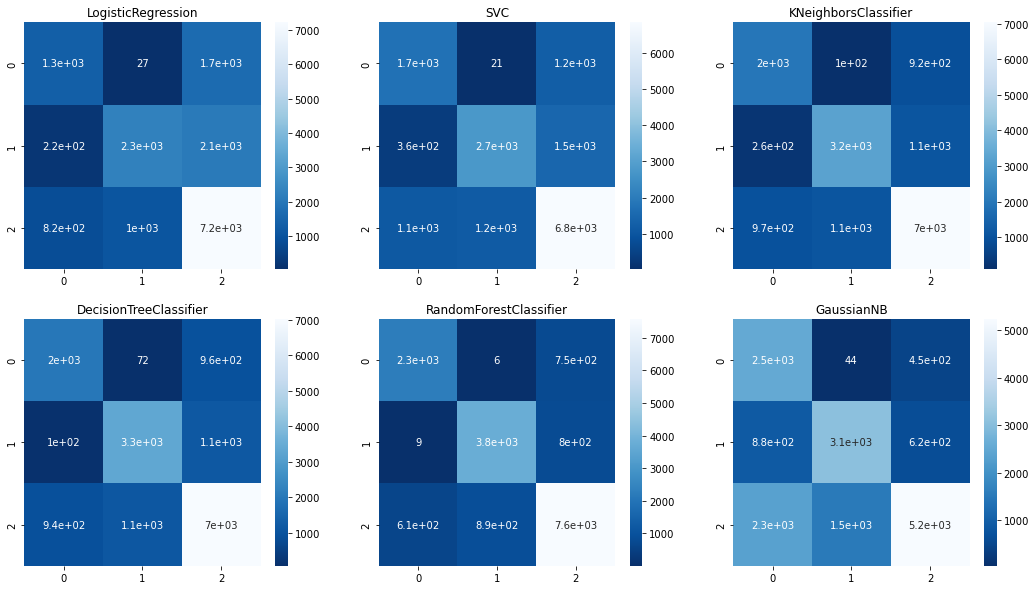

In [57]:
fig = plt.figure(figsize = (18,10))
for i in range(len(confusion_matrix_list)):
    
    cm = confusion_matrix_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap='Blues_r')

In [58]:
result = pd.DataFrame({'Model':model_list, 'Accuracy': accuracy_list, 'F1 score':f1_score_list})

In [61]:
result

,Model,Accuracy,F1 score
0,LogisticRegression,0.649148,0.595963
1,SVC,0.679866,0.647769
2,KNeighborsClassifier,0.734401,0.710527
3,DecisionTreeClassifier,0.739621,0.719631
4,RandomForestClassifier,0.815575,0.804077
5,GaussianNB,0.649208,0.641062
